# Income Predictor Dataset
Source: [https://www.kaggle.com/datasets/jainaru/adult-income-census-dataset/data](https://www.kaggle.com/datasets/jainaru/adult-income-census-dataset/data)

In [101]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression

In [89]:
# Import the dataset
df = pd.read_csv("adult.csv")

In [90]:
# Preview the first 5 rows
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
df.replace('?', pd.NA, inplace=True) # TODO: Combine this line and the next into a single action

# Drop rows with NA columns
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


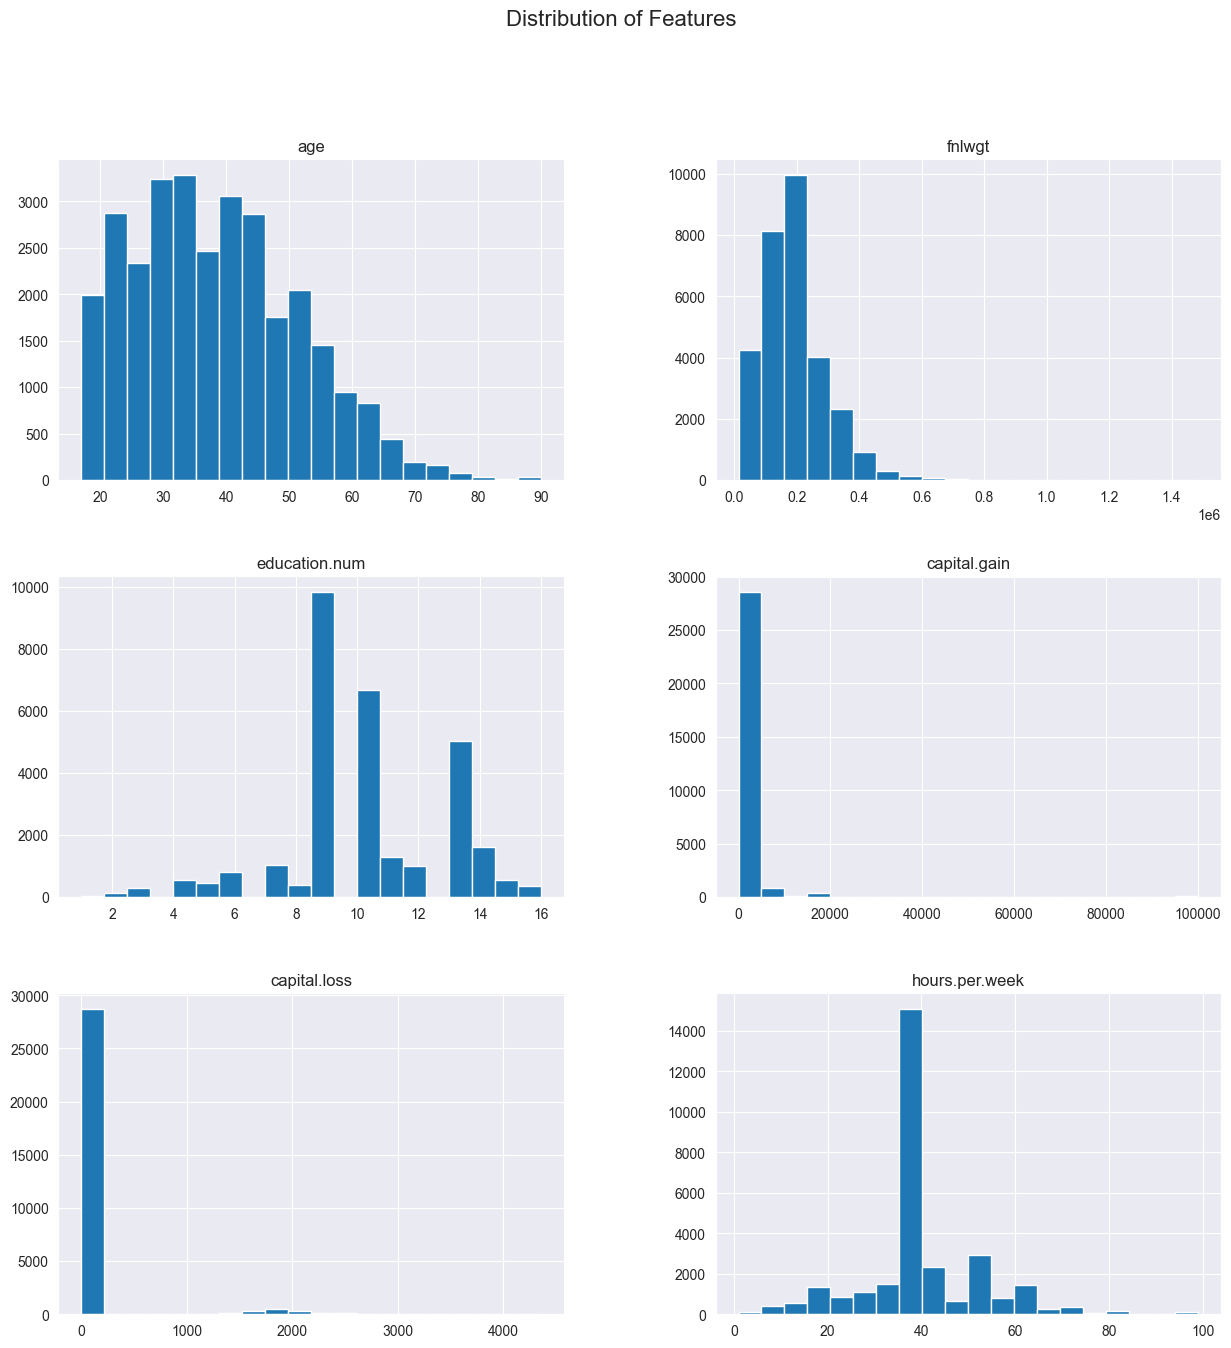

In [93]:
# Create some histogram plots to get an idea of the distribution for each feature

# Plot histograms for each feature
df.hist(figsize=(15, 15), bins=20)
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

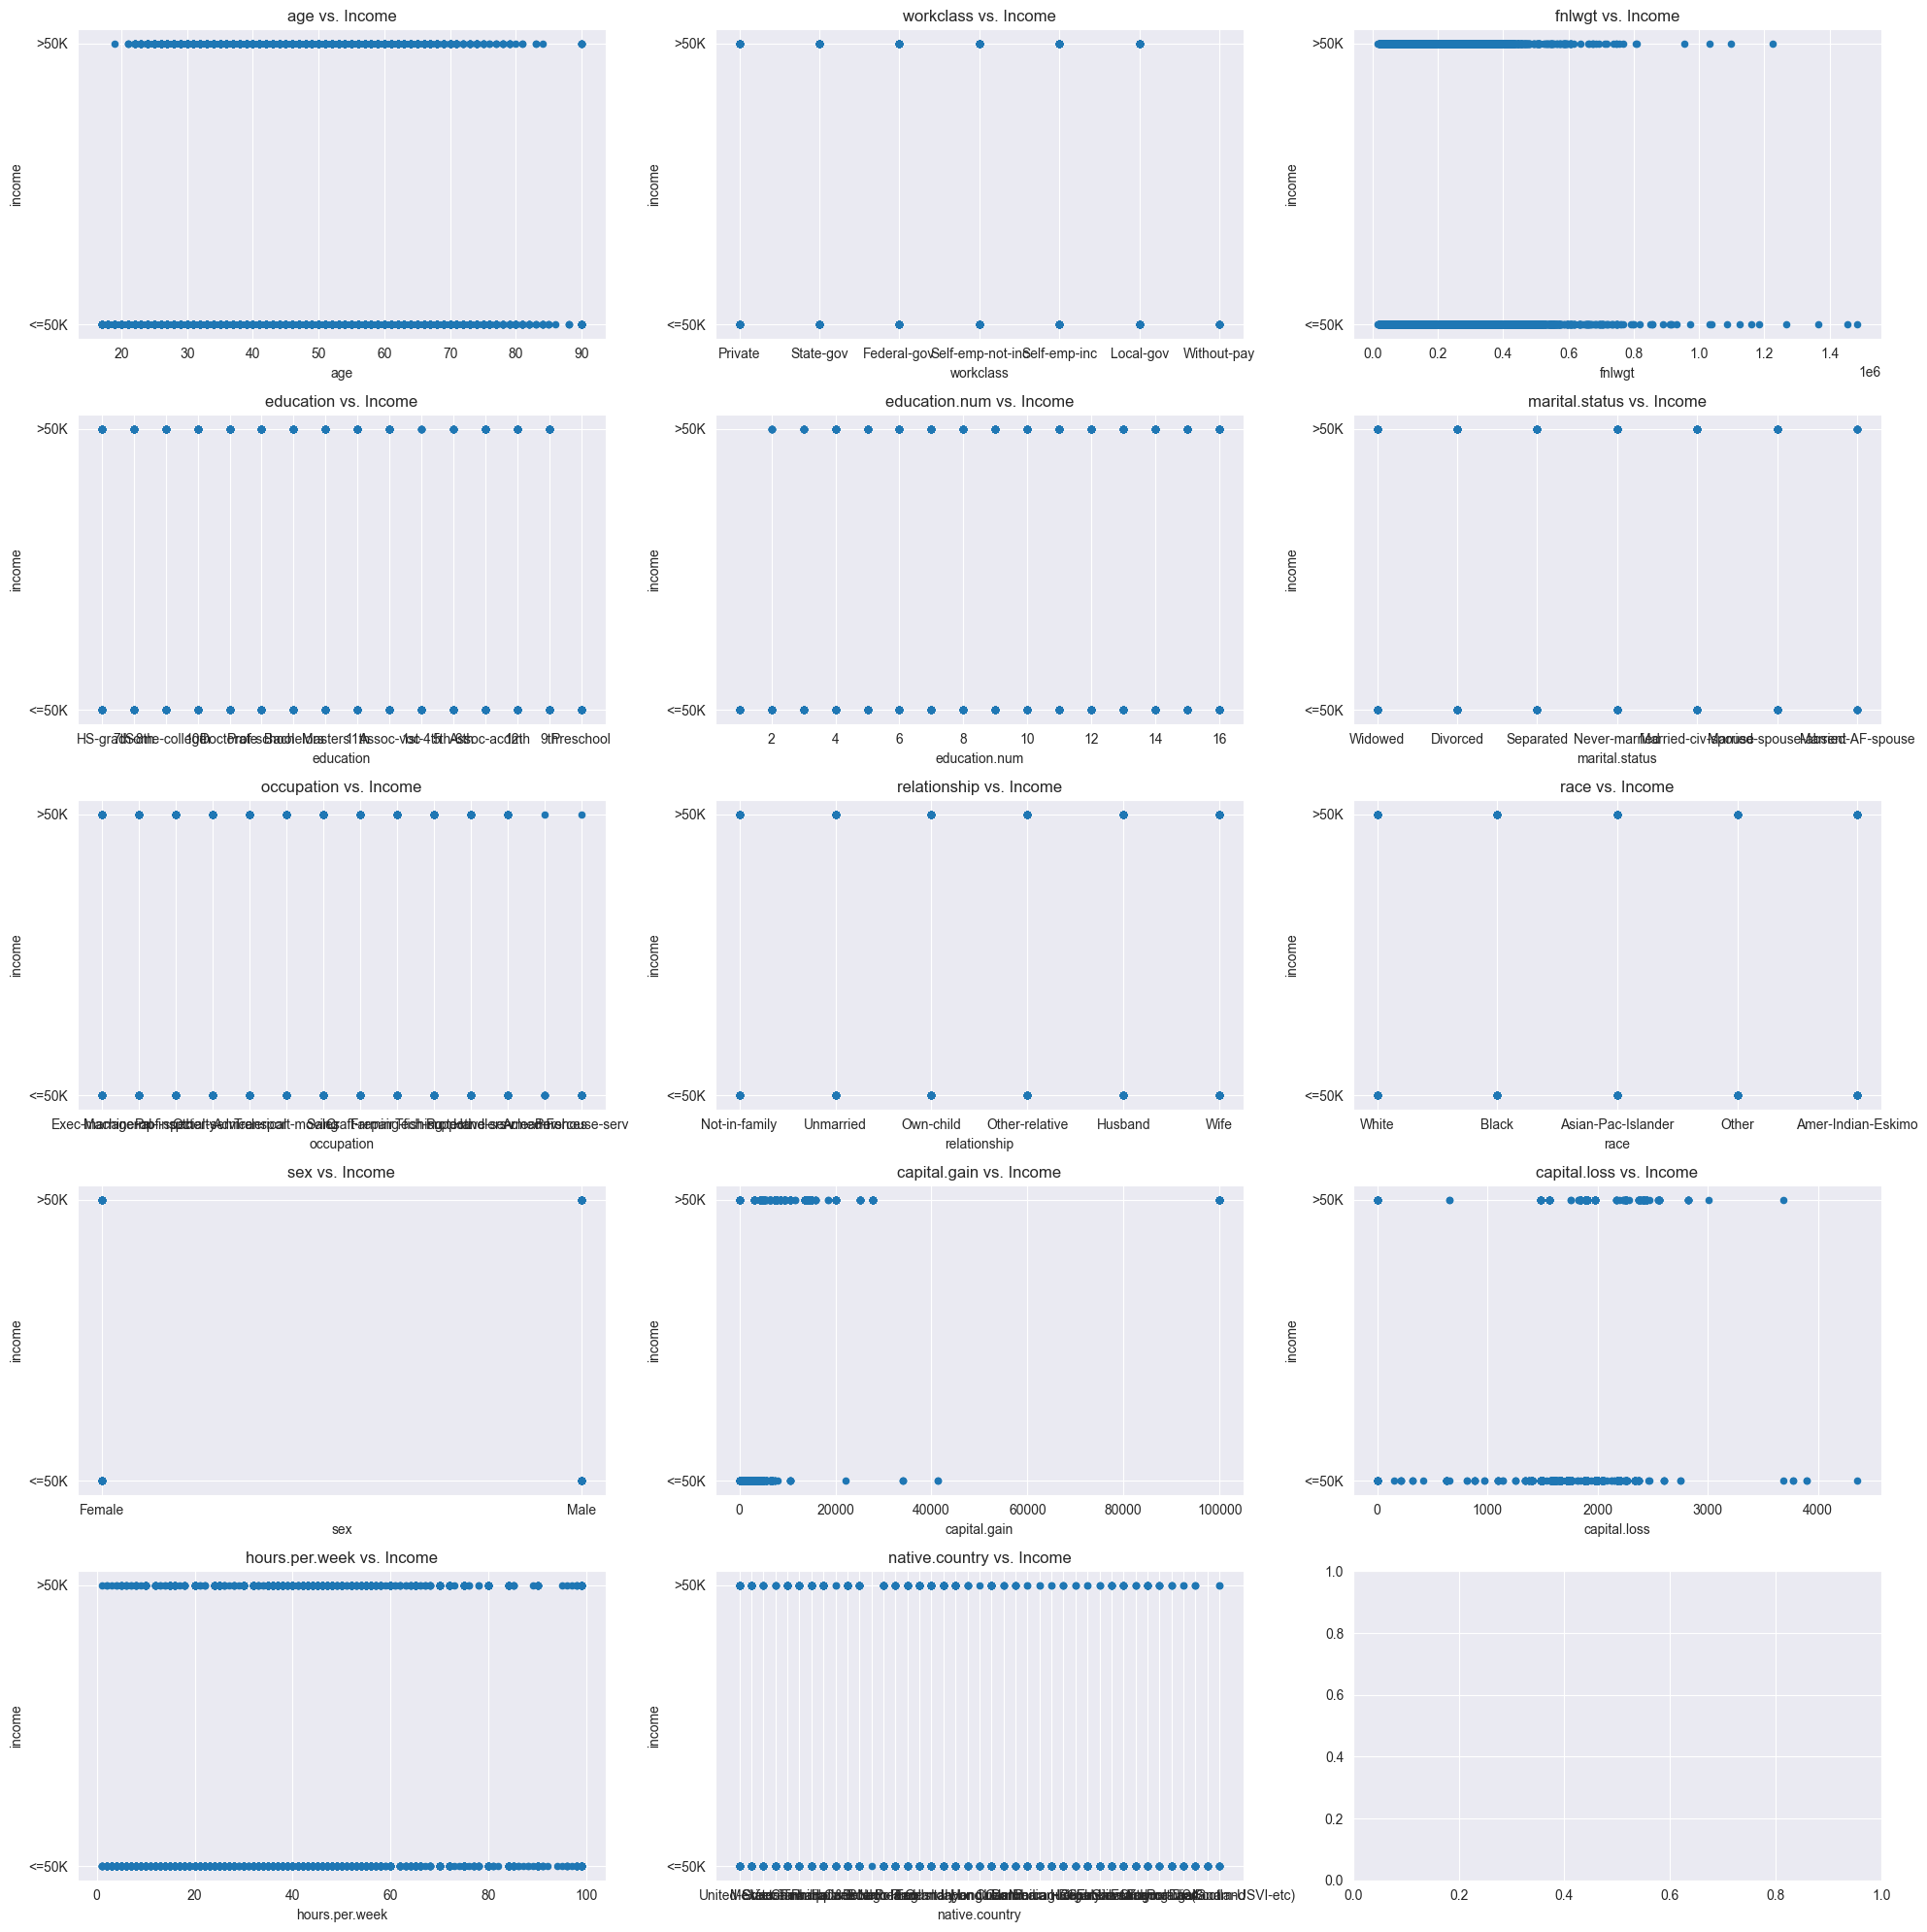

In [94]:
# Create sub-plots to get an idea of how each feature affects the price

# This creates a grid of subplots arranged in a 5x4 grid (5 rows and 4 columns) within a single figure.
# axes is an array where each element corresponds to a subplot's position in the grid. Ex: axes[0, 0] represents the subplot at the top-left corner
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Plot each feature against the price
for i, column in enumerate(df.columns):
    if column != "income":
        df.plot(kind="scatter", x=column, y="income", ax=axes[i])
        axes[i].set_title(f'{column} vs. Income')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

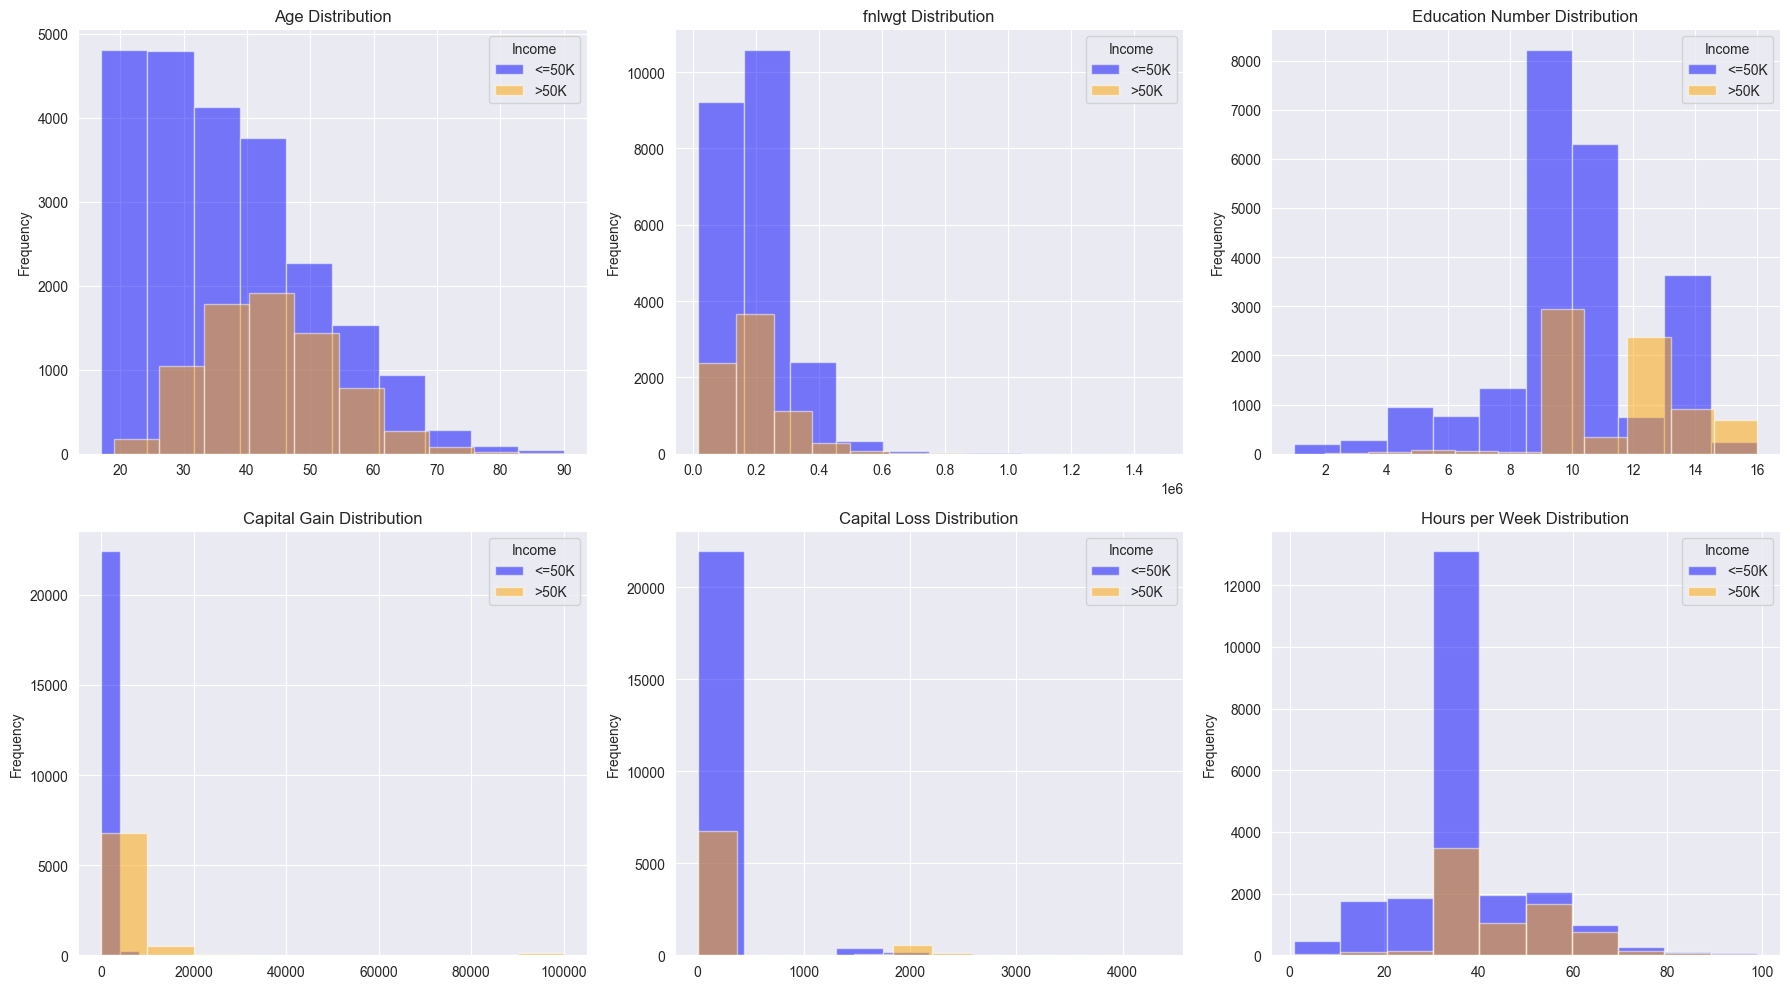

In [95]:
# Visualize the distributions of numerical features by income
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Age
df[df['income'] == '<=50K']['age'].plot(kind='hist', ax=axes[0, 0], alpha=0.5, title='Age Distribution', color='blue', label='<=50K')
df[df['income'] == '>50K']['age'].plot(kind='hist', ax=axes[0, 0], alpha=0.5, title='Age Distribution', color='orange', label='>50K')
axes[0, 0].legend(loc="upper right", title="Income")

# Final Weight
df[df['income'] == '<=50K']['fnlwgt'].plot(kind='hist', ax=axes[0, 1], alpha=0.5, title='fnlwgt Distribution', color='blue', label='<=50K')
df[df['income'] == '>50K']['fnlwgt'].plot(kind='hist', ax=axes[0, 1], alpha=0.5, title='fnlwgt Distribution', color='orange', label='>50K')

# Education Number
df[df['income'] == '<=50K']['education.num'].plot(kind='hist', ax=axes[0, 2], alpha=0.5, title='Education Number Distribution', color='blue', label='<=50K')
df[df['income'] == '>50K']['education.num'].plot(kind='hist', ax=axes[0, 2], alpha=0.5, title='Education Number Distribution', color='orange', label='>50K')

# Capital Gain
df[df['income'] == '<=50K']['capital.gain'].plot(kind='hist', ax=axes[1, 0], alpha=0.5, title='Capital Gain Distribution', color='blue', label='<=50K')
df[df['income'] == '>50K']['capital.gain'].plot(kind='hist', ax=axes[1, 0], alpha=0.5, title='Capital Gain Distribution', color='orange', label='>50K')

# Capital Loss
df[df['income'] == '<=50K']['capital.loss'].plot(kind='hist', ax=axes[1, 1], alpha=0.5, title='Capital Loss Distribution', color='blue', label='<=50K')
df[df['income'] == '>50K']['capital.loss'].plot(kind='hist', ax=axes[1, 1], alpha=0.5, title='Capital Loss Distribution', color='orange', label='>50K')

# Hours per Week
df[df['income'] == '<=50K']['hours.per.week'].plot(kind='hist', ax=axes[1, 2], alpha=0.5, title='Hours per Week Distribution', color='blue', label='<=50K')
df[df['income'] == '>50K']['hours.per.week'].plot(kind='hist', ax=axes[1, 2], alpha=0.5, title='Hours per Week Distribution', color='orange', label='>50K')

# Set the legend for all plots
for ax in axes:
    for sub_ax in ax:
        sub_ax.legend(loc="upper right", title="Income")

plt.tight_layout()
# plt.legend(loc="upper left")
plt.show()

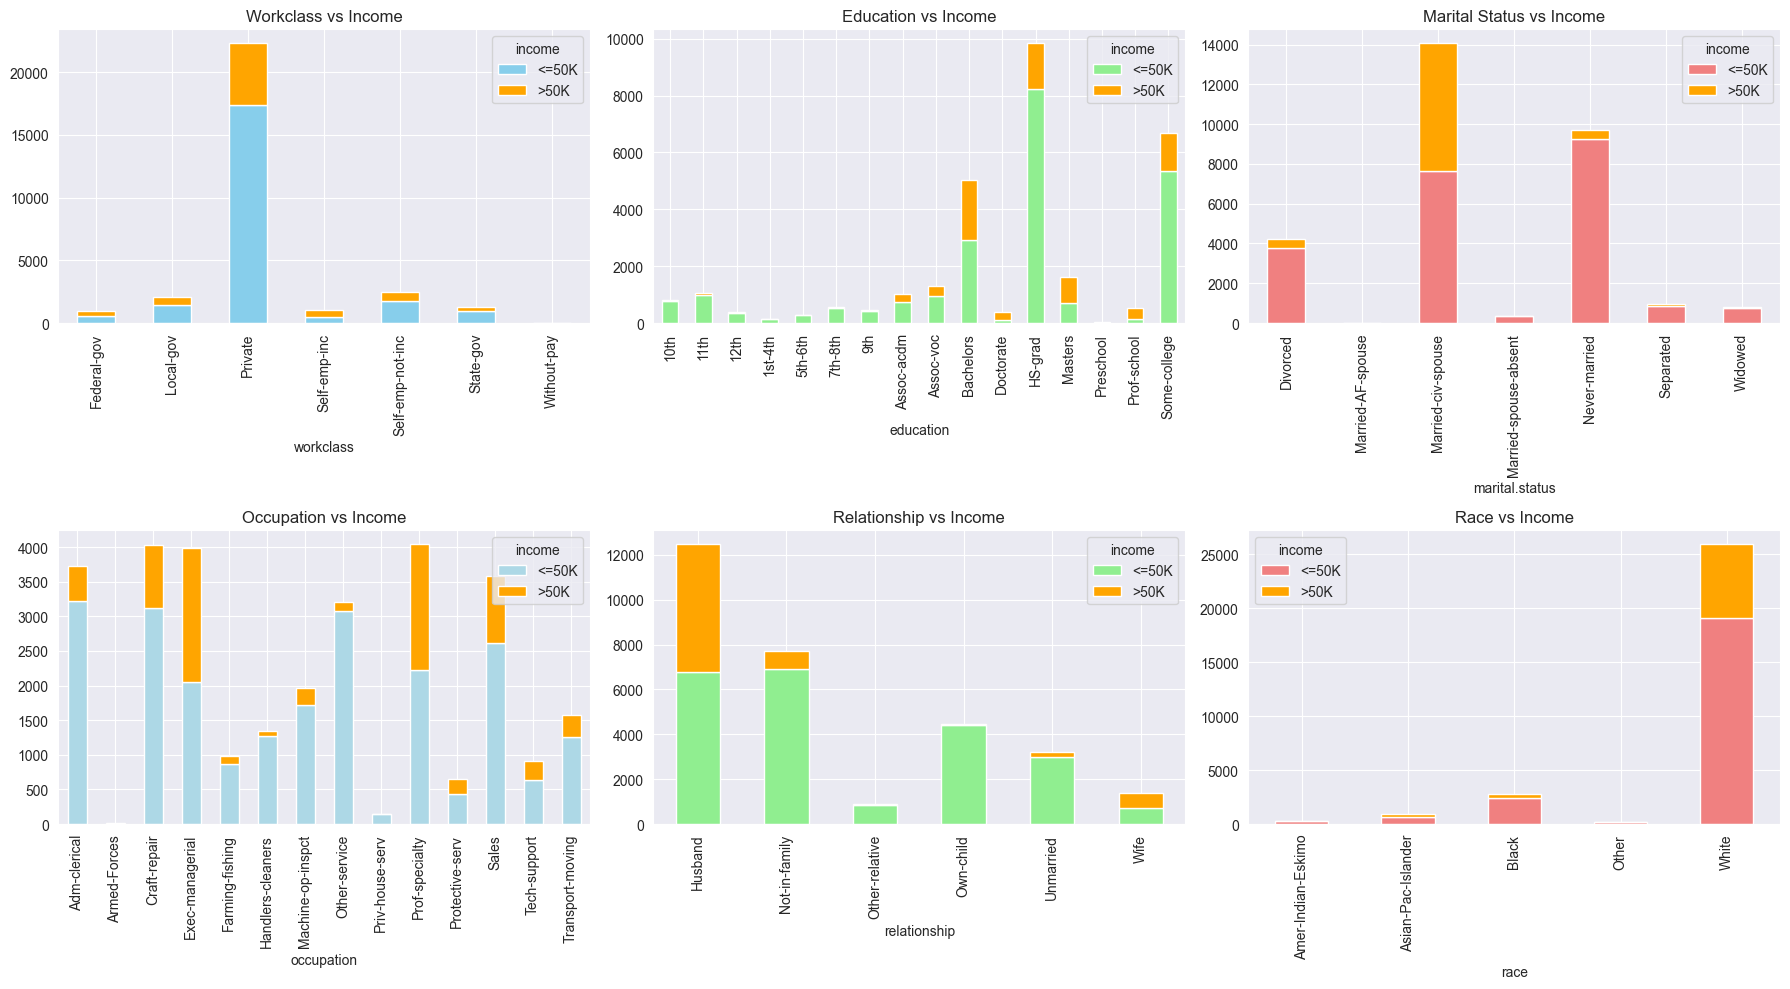

In [96]:
# Plotting stacked bar plots for categorical features by income
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Workclass
pd.crosstab(df['workclass'], df['income']).plot(kind='bar', stacked=True, ax=axes[0, 0], title='Workclass vs Income', color=['skyblue', 'orange'])

# Education
pd.crosstab(df['education'], df['income']).plot(kind='bar', stacked=True, ax=axes[0, 1], title='Education vs Income', color=['lightgreen', 'orange'])

# Marital Status
pd.crosstab(df['marital.status'], df['income']).plot(kind='bar', stacked=True, ax=axes[0, 2], title='Marital Status vs Income', color=['lightcoral', 'orange'])

# Occupation
pd.crosstab(df['occupation'], df['income']).plot(kind='bar', stacked=True, ax=axes[1, 0], title='Occupation vs Income', color=['lightblue', 'orange'])

# Relationship
pd.crosstab(df['relationship'], df['income']).plot(kind='bar', stacked=True, ax=axes[1, 1], title='Relationship vs Income', color=['lightgreen', 'orange'])

# Race
pd.crosstab(df['race'], df['income']).plot(kind='bar', stacked=True, ax=axes[1, 2], title='Race vs Income', color=['lightcoral', 'orange'])

plt.tight_layout()
plt.show()

In [97]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head(10)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,140359,4,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41,264663,10,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
5,34,216864,9,0,3770,45,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
6,38,150601,6,0,3770,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
7,74,88638,16,0,3683,20,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8,68,422013,9,0,3683,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,45,172274,16,0,3004,35,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
11,38,164526,15,0,2824,45,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
12,52,129177,13,0,2824,20,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [102]:
# Split the data into features and target
X = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [103]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[6240  514]
 [ 898 1397]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.92      0.90      6754
        True       0.73      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.84      0.84      9049


Accuracy Score: 0.8439606586363134


In [107]:
from sklearn.ensemble import RandomForestClassifier

# We got an accuracy score of ~84% with logistic regression. We'll try using random forests to see if we can achieve a better score.
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[6211  543]
 [ 847 1448]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90      6754
        True       0.73      0.63      0.68      2295

    accuracy                           0.85      9049
   macro avg       0.80      0.78      0.79      9049
weighted avg       0.84      0.85      0.84      9049


Accuracy Score: 0.8463918665045861


# Note
The cells below are not intended to be part of the model 

In [86]:
df2 = pd.DataFrame({
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'value': [10, 20, 30, 40, 50]
})

print(df2)

df_encoded = pd.get_dummies(df2)
print(df_encoded)

   color  value
0    red     10
1  green     20
2   blue     30
3  green     40
4    red     50
   value  color_blue  color_green  color_red
0     10       False        False       True
1     20       False         True      False
2     30        True        False      False
3     40       False         True      False
4     50       False        False       True


<class 'pandas.core.series.Series'>
Index: 22654 entries, 1 to 32560
Series name: age
Non-Null Count  Dtype
--------------  -----
22654 non-null  int64
dtypes: int64(1)
memory usage: 354.0 KB
None
------------
count    22654.000000
mean        36.608060
std         13.464631
min         17.000000
25%         26.000000
50%         34.000000
75%         45.000000
max         90.000000
Name: age, dtype: float64
------------
------------
count    22654.000000
mean        36.608060
std         13.464631
min         17.000000
25%         26.000000
50%         34.000000
75%         45.000000
max         90.000000
Name: age, dtype: float64
count    10.000000
mean     47.900000
std      18.870612
min      21.000000
25%      35.000000
50%      46.000000
75%      59.250000
max      82.000000
Name: age, dtype: float64
Axes(0.125,0.11;0.775x0.77)
1     82
3     54
4     41
5     34
6     38
8     68
21    29
22    61
23    51
25    21
Name: age, dtype: int64


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


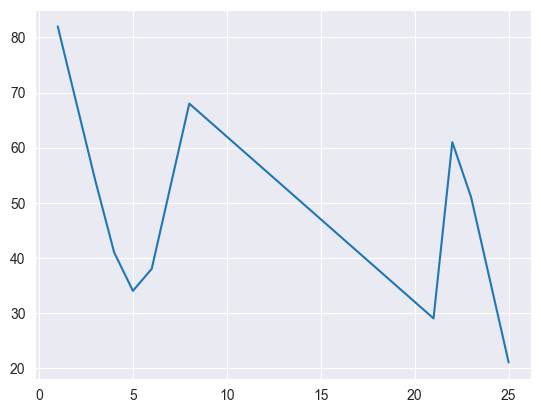

In [79]:
lessThan50 = pd.Series(df[df['income'] == '<=50K']['age'])
moreThan50 = df[df['income'] == '>50K']['age']

# print(type(lessThan50))
# print(type(moreThan50))


print(lessThan50.info())
print("------------")
print(pd.Series(lessThan50).describe())
print("------------")
# print(lessThan50.plot())
print("------------")
print(lessThan50.describe())

tmp = pd.Series(lessThan50.iloc[:10])
print(tmp.describe())
print(tmp.plot())

print(tmp.head(10))
df.head(25)